## Cluster confusion matrix

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [24]:
K = 7

cx_name = ['None', 'interstitial lung disease', 'Renal compromise', 'Malignancy of lung', 'PAH', 'Lymphoma', 'Thrombocytopenia']
group_name = [str(i) for i in range(K)]

In [25]:
cluster = np.array([
    [2531.0, 64294.0, 235.0, 16931.0, 3350.0, 7992.0, 937.0],
    [15.0, 786.0, 20.0, 997.0, 35.0, 172.0, 103.0],
    [59.0, 2192.0, 3229.0, 110.0, 441.0, 296.0, 51.0],
    [1.0, 80.0, 36.0, 16.0, 4.0, 42.0, 223.0],
    [7.0, 57.0, 0.0, 11.0, 7.0, 47.0, 212.0],
    [320.0, 39.0, 0.0, 5.0, 3.0, 1.0, 0.0],
    [92.0, 366.0, 12.0, 24.0, 839.0, 41.0, 0.0]
]).astype(float)

print(np.sum(cluster, axis=0))
print(np.sum(cluster, axis=1))

cluster_by_group = cluster / cluster.sum(axis=1, keepdims=True)
cluster_by_cx = cluster / cluster.sum(axis=0, keepdims=True)

cluster_by_group

[ 3025. 67814.  3532. 18094.  4679.  8591.  1526.]
[96270.  2128.  6378.   402.   341.   368.  1374.]


array([[0.02629064, 0.66785084, 0.00244105, 0.17586995, 0.03479796,
        0.08301652, 0.00973304],
       [0.00704887, 0.3693609 , 0.0093985 , 0.46851504, 0.01644737,
        0.08082707, 0.04840226],
       [0.00925055, 0.3436814 , 0.50627156, 0.01724679, 0.06914393,
        0.04640953, 0.00799624],
       [0.00248756, 0.19900498, 0.08955224, 0.039801  , 0.00995025,
        0.10447761, 0.55472637],
       [0.02052786, 0.16715543, 0.        , 0.03225806, 0.02052786,
        0.13782991, 0.62170088],
       [0.86956522, 0.10597826, 0.        , 0.01358696, 0.00815217,
        0.00271739, 0.        ],
       [0.06695779, 0.26637555, 0.00873362, 0.01746725, 0.61062591,
        0.02983988, 0.        ]])

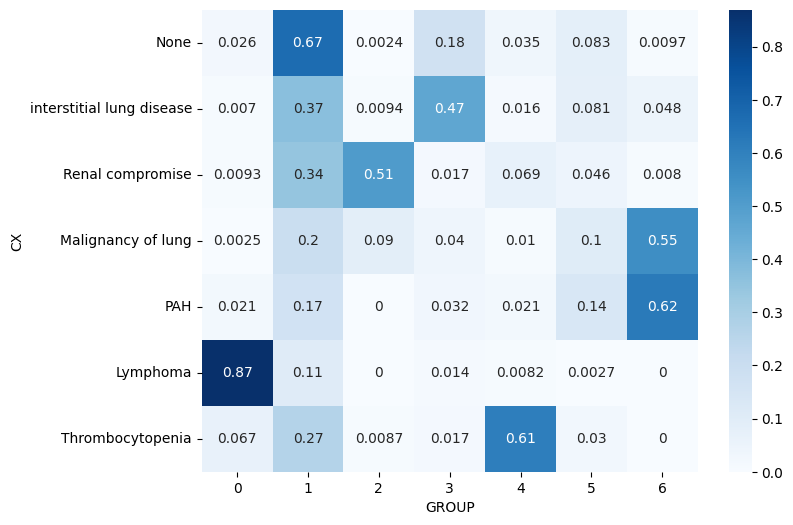

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cluster_by_group, annot=True, cmap='Blues', cbar=True, xticklabels=group_name, yticklabels=cx_name)

ax.set_xlabel('GROUP')
ax.set_ylabel('CX')

plt.show()

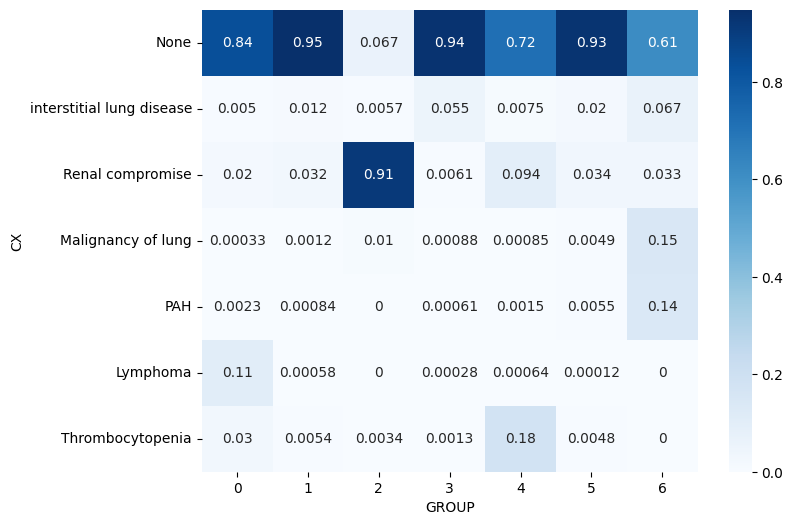

In [28]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cluster_by_cx, annot=True, cmap='Blues', cbar=True, xticklabels=group_name, yticklabels=cx_name)

ax.set_xlabel('GROUP')
ax.set_ylabel('CX')

plt.show()

## Interactive TSNE trajectory plot

In [29]:
import numpy as np
from sklearn.manifold import TSNE

In [14]:
x_corpus = np.load('../temp_model/[event_mc_sup--TEDA__pp_single_mark-concat]/data/x_corpus.npz')['arr_0']
idcode = np.load('../temp_model/[event_mc_sup--TEDA__pp_single_mark-concat]/data/idcode.npz')['arr_0']
cluster = np.load('../temp_model/[event_mc_sup--TEDA__pp_single_mark-concat]/data/cluster.npz')['arr_0']
label = np.load('../temp_model/[event_mc_sup--TEDA__pp_single_mark-concat]/data/label.npz')['arr_0']

In [15]:
idcode.shape

(81770,)

In [16]:
np.unique(cluster, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6.]),
 array([ 4992, 53491,  4660,  1874,  5123,  8120,  3510]))

In [17]:
x_corpus_out = x_corpus[cluster != 5]
x_corpus_in = x_corpus[cluster == 5]

In [8]:
print(np.mean(x_corpus_out, axis=0))
print(np.mean(x_corpus_in, axis=0))

[ 1.0194660e-03 -4.1758142e+00  1.0460548e+00 -2.5998065e-01
 -3.3913490e-01  8.5456553e-04  1.1180068e-01  4.5185223e-01
  3.5915440e-03  3.5018826e-01  2.2269944e-02  5.2195691e-02
  8.0482056e-04  1.1754376e-03 -1.2078929e-03 -1.2054759e-03]
[ 1.0601018e-03 -4.2427135e+00 -4.0328917e-01  4.3276426e-01
  1.5003619e-01  2.4061438e-03  3.3239737e-01  1.0939906e+00
  1.0704199e-02  7.5770788e-02  1.6065614e-01 -4.4105370e-02
  8.0490054e-04  1.1761788e-03 -1.2088431e-03 -1.2057824e-03]


In [13]:
# Conduct t-tests for each feature against each other group
t_test_results = []
distinct_group_label = 5
distinct_group_data = x_corpus[cluster == distinct_group_label]
for i in range(7):
    if i != distinct_group_label:
        other_group_data = x_corpus[cluster == i]
        for feature_idx in range(x_corpus.shape[1]):
            t_stat, p_value = ttest_ind(distinct_group_data[:, feature_idx], other_group_data[:, feature_idx], equal_var=False)
            t_test_results.append({
                'Feature': feature_idx,
                'Group Compared': i,
                'C1': np.mean(distinct_group_data[:, feature_idx]),
                'C2': np.mean(other_group_data[:, feature_idx]),
                'T-Statistic': t_stat,
                'P-Value': p_value,
                'heatmap_v': (p_value < 0.05 / 6) * 1.0
            })

# Convert t-test results to DataFrame
t_test_df = pd.DataFrame(t_test_results)

# Adjust for multiple comparisons using Bonferroni correction
alpha = 0.05
bonferroni_correction = alpha / (7 - 1)  # 7 groups, but we exclude the distinct group itself

# Determine significant results
t_test_df['Significant'] = t_test_df['P-Value'] < bonferroni_correction

# Display the t-test results
t_test_df[t_test_df['Significant']]

/home/tunajaw/anaconda3/envs/TEE4EHR/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Feature,Group Compared,C1,C2,T-Statistic,P-Value,heatmap_v,Significant
0,0,0,0.001060,0.002183,-22.718296,1.998167e-80,1.0,True
1,1,0,-4.242714,-4.078807,-7.855083,2.313640e-14,1.0,True
2,2,0,-0.403289,1.112387,-61.118392,9.163178e-238,1.0,True
3,3,0,0.432764,-0.094654,61.438578,1.095326e-246,1.0,True
4,4,0,0.150036,-0.594112,96.968871,0.000000e+00,1.0,True
...,...,...,...,...,...,...,...,...
89,9,6,0.075771,0.229283,-10.883739,4.517108e-25,1.0,True
90,10,6,0.160656,0.115633,11.436331,2.152569e-27,1.0,True
91,11,6,-0.044105,0.029880,-12.920810,1.258900e-33,1.0,True
92,12,6,0.000805,0.000805,21.028267,3.837130e-76,1.0,True


<Axes: >

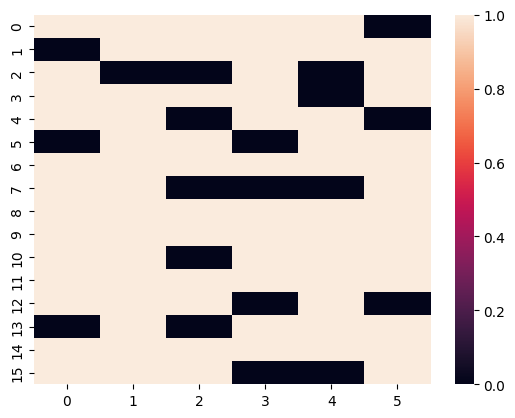

In [25]:
import seaborn as sns
sns.heatmap(t_test_df['heatmap_v'].to_numpy().reshape((16, 6)))


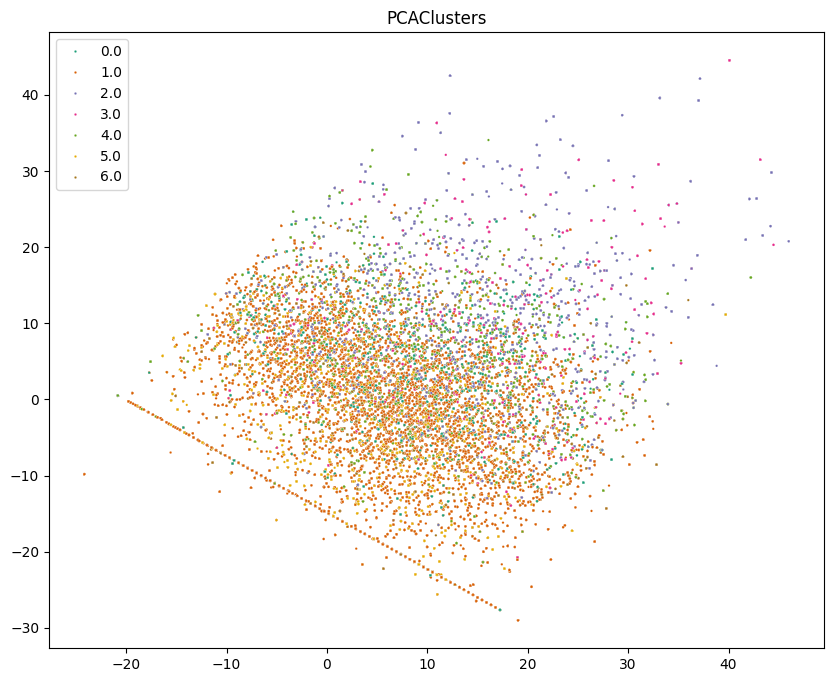

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_results = pca.fit_transform(x_corpus)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], hue=cluster, palette='Dark2', s=3)
plt.title('PCAClusters')
plt.show()

In [47]:

str([int(x) for x in list(set(idcode[label == 2]) - set(idcode[cluster == 6]))])

'[8195, 4099, 4103, 8200, 8202, 10, 4109, 16, 4117, 4118, 4130, 35, 8227, 37, 38, 4135, 44, 4141, 8244, 61, 4157, 4163, 4165, 8262, 79, 4177, 82, 8275, 4181, 8283, 4187, 8286, 4193, 4196, 103, 8296, 4199, 106, 4201, 8303, 8305, 116, 8309, 4219, 125, 131, 4228, 138, 147, 8342, 4251, 156, 8356, 8360, 4264, 8364, 8370, 8371, 181, 4278, 183, 4283, 4284, 4286, 4288, 4290, 8395, 4302, 8404, 213, 217, 220, 221, 8415, 8416, 8418, 232, 8427, 238, 4336, 8435, 245, 4343, 8445, 8446, 4350, 258, 263, 8457, 8460, 4369, 4373, 4379, 8478, 8480, 8492, 304, 8499, 8501, 4405, 8506, 325, 329, 334, 8527, 8529, 8533, 8536, 8538, 8541, 8549, 8551, 4455, 373, 4470, 8567, 8568, 378, 379, 4478, 4479, 8576, 4482, 390, 4487, 8590, 398, 4495, 8597, 8604, 4512, 4518, 8615, 4520, 8623, 8627, 4534, 4535, 8633, 8643, 4548, 454, 457, 4553, 4555, 4556, 8659, 468, 8668, 8672, 4579, 486, 8680, 4584, 8682, 8683, 4585, 4588, 496, 8692, 8693, 8694, 503, 504, 8695, 4599, 510, 8704, 4609, 4610, 4614, 523, 4625, 531, 4628, 8735

In [37]:
np.unique(idcode[cluster == 6]).astype(int)

array([   83,    86,   337,   589,   770,   859,   881,   964,  1028,
        1269,  1570,  1581,  1663,  1707,  1874,  1892,  1925,  2092,
        2334,  2398,  2551,  2583,  2602,  2656,  2658,  2800,  2930,
        2949,  3000,  3079,  3210,  3434,  3436,  4008,  4231,  4468,
        4714,  4758,  4774,  5204,  5410,  6260,  6330,  6392,  6530,
        6576,  6604,  6773,  6834,  7029,  7031,  7237,  7352,  7375,
        7410,  7411,  7572,  7651,  7801,  7974,  8272,  8365,  8482,
        8498,  8652,  8912,  9033,  9235,  9268,  9401,  9506,  9543,
        9617,  9742,  9828,  9930,  9964, 10084, 10258, 10368, 10371,
       10413, 10471, 10537, 10547, 10710, 10909, 11005])

In [20]:
ID = 10710
print(label[idcode == ID])
print(cluster[idcode == ID])

[2 2 2 2 2 2 2 2 2]
[3. 5. 6. 6. 6. 6. 6. 6. 6.]


In [24]:
IDCODE = 9553
print(cluster[idcode == IDCODE])
print(label[idcode == IDCODE])

[1. 1. 1. 1. 1. 4. 1. 0. 0. 2. 2. 2.]
[0 0 0 0 0 0 0 0 0 0 0 0]


Text(0, 0.5, 't-SNE component 2')

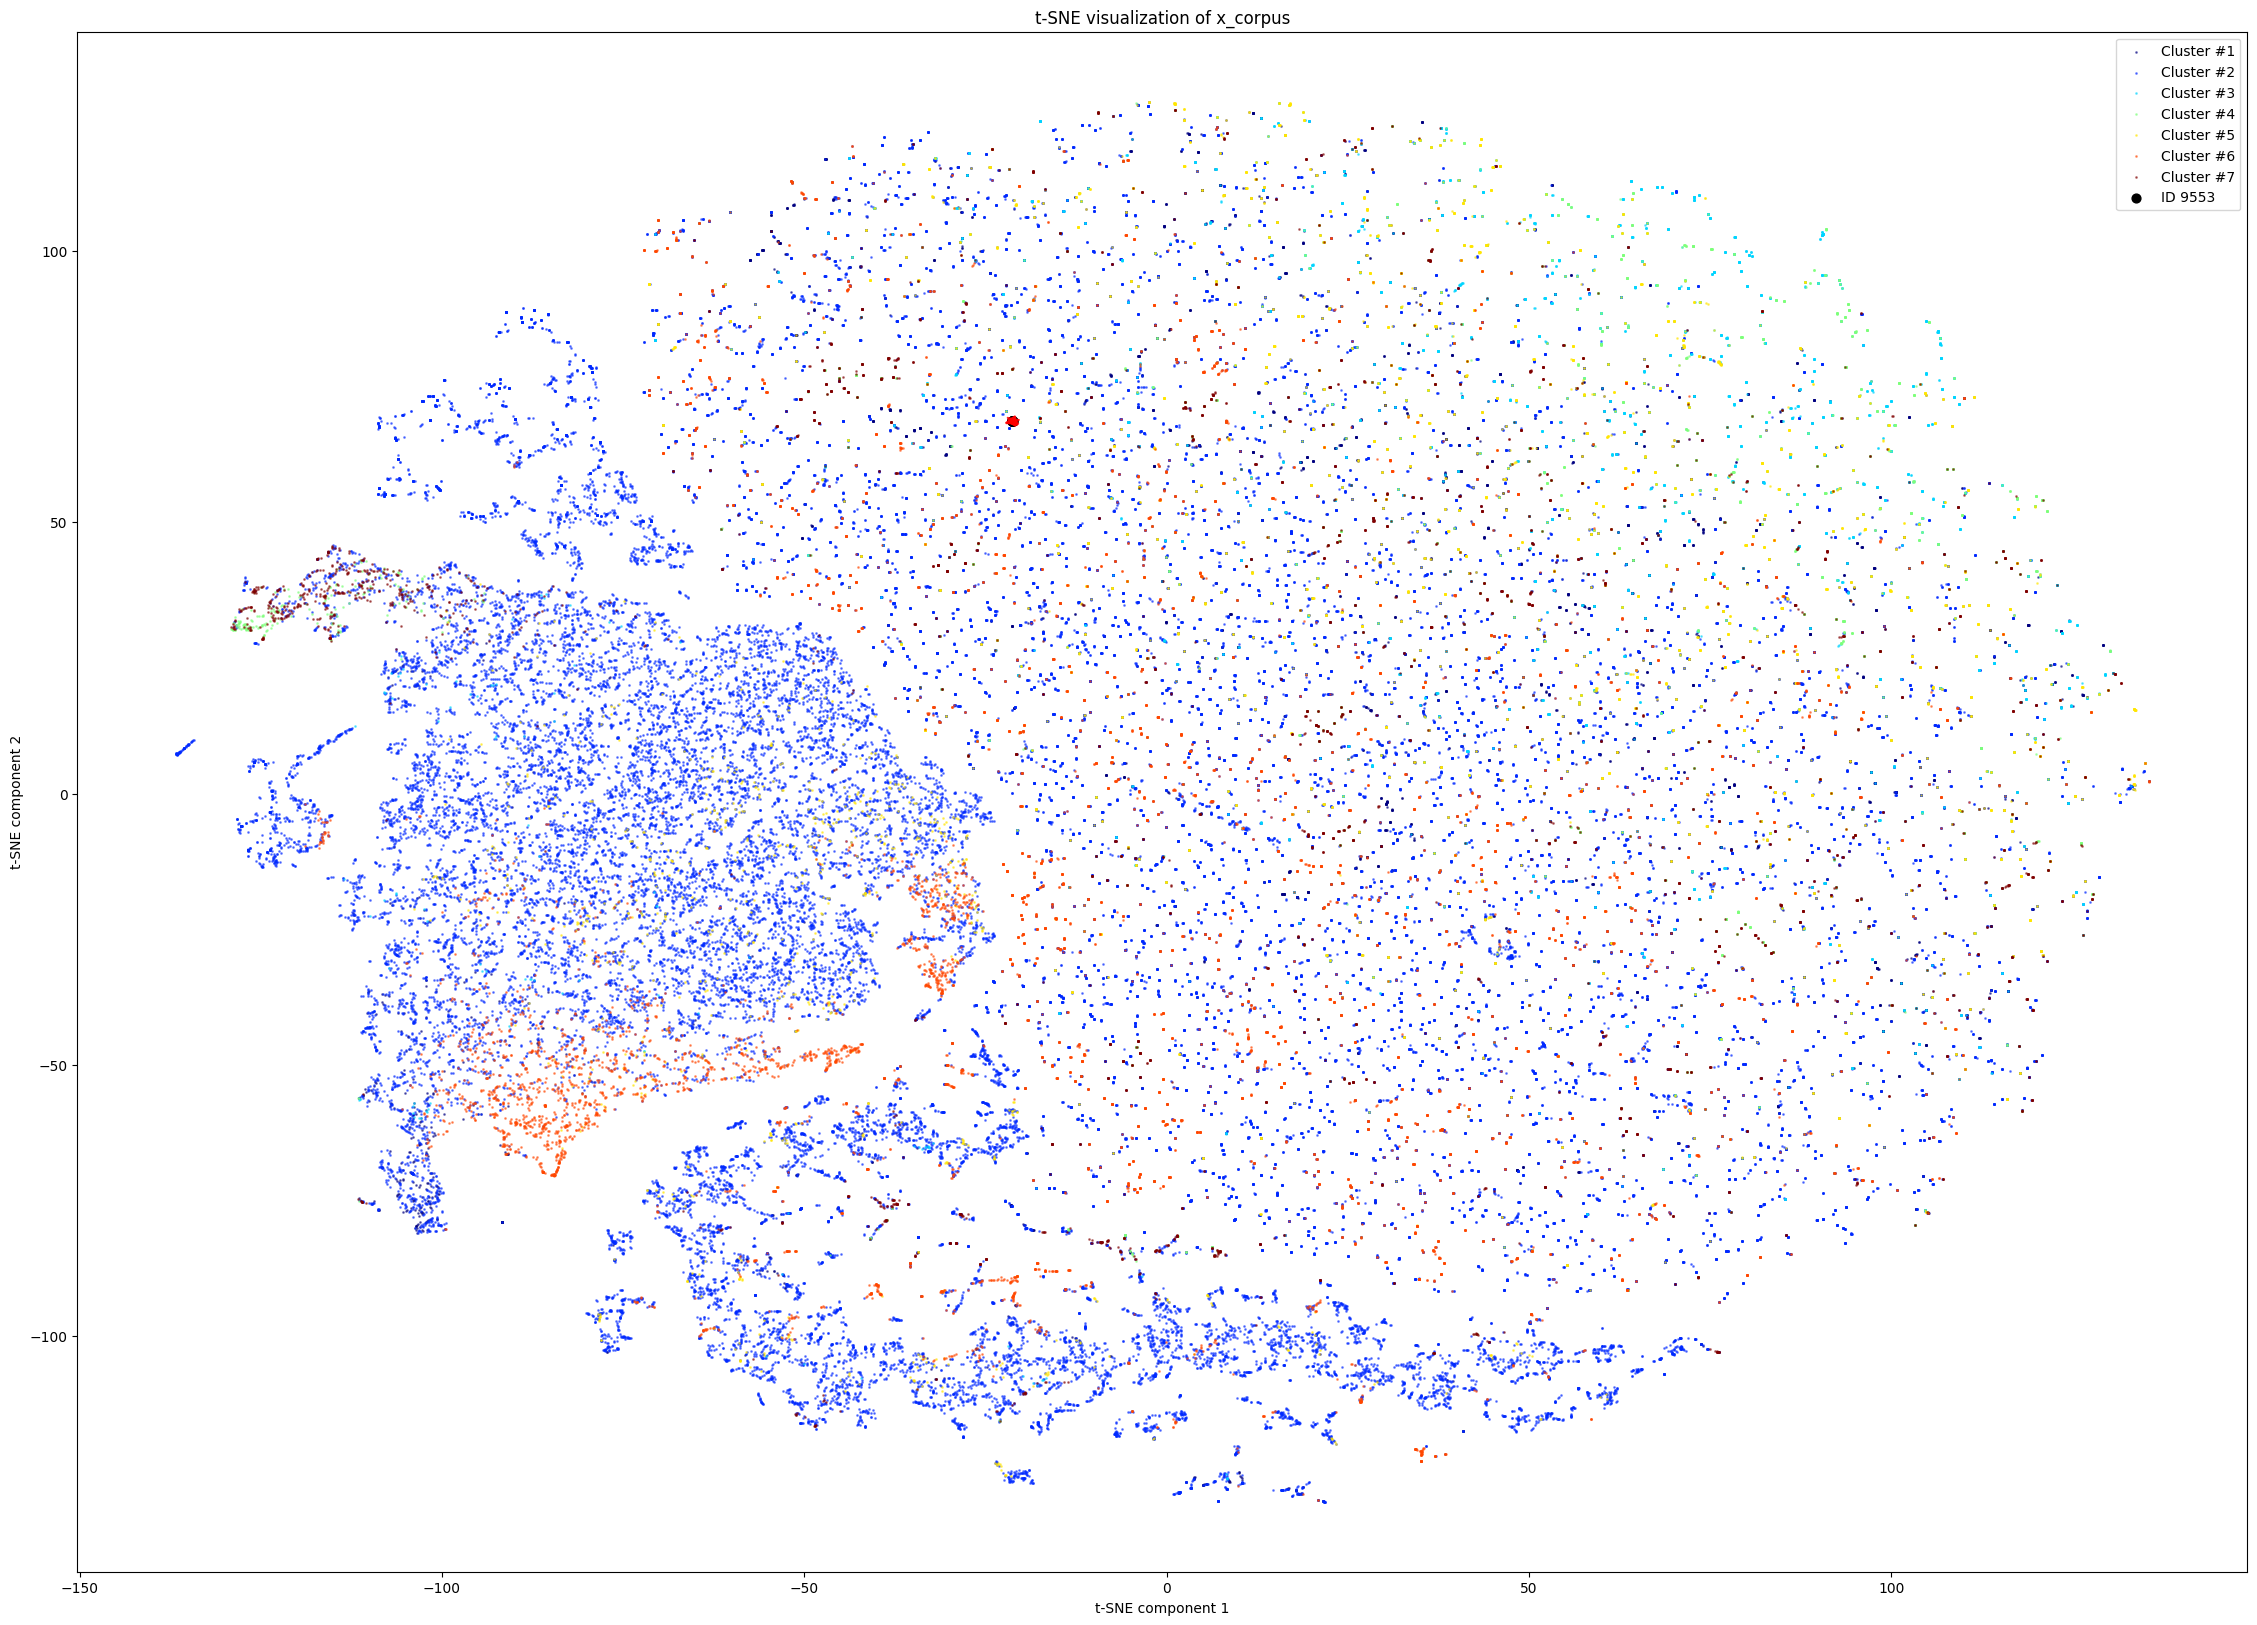

In [25]:
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_corpus)

plt.figure(figsize=(28, 20))

cx_name = [f"Cluster #{i}" for i in range(1, 8)]

unique_clusters = np.unique(cluster)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

for i, unique_cluster in enumerate(unique_clusters):
    plt.scatter(x_tsne[cluster == unique_cluster, 0], x_tsne[cluster == unique_cluster, 1], 
                color=colors[i], label=f'{cx_name[i]}', alpha=0.5, s=1)
    
highlight_points = x_tsne[idcode == IDCODE]
plt.scatter(highlight_points[:, 0], highlight_points[:, 1], color='black', label=f'ID {IDCODE}', alpha=1, s=40)

highlight_indices = np.where(idcode == IDCODE)[0]
for i in range(len(highlight_indices) - 1):
    start_idx = highlight_indices[i]
    end_idx = highlight_indices[i + 1]
    plt.arrow(x_tsne[start_idx, 0], x_tsne[start_idx, 1], 
              x_tsne[end_idx, 0] - x_tsne[start_idx, 0], 
              x_tsne[end_idx, 1] - x_tsne[start_idx, 1], 
              color='red', alpha=0.8, head_width=1, head_length=1)

plt.legend()
plt.title('t-SNE visualization of x_corpus')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')

## PCA

In [26]:
x_corpus.shape

(81770, 148)